## Objetivo: Desenvolver um modelo de admissão 

## Sumário:

### 1. Bibliotecas utilizadas
- **Pandas**: para manipulação de dados.
- **Numpy**: para cálculos e operações matemáticas.
- **Seaborn/Matplotlib**: para visualizações gráficas.
- **Scikit-learn**: para machine learning e pré-processamento de dados.
- **Keras**: para construção de redes neurais.

### 2. Leitura do arquivo
Carregamento e leitura dos dados utilizando o **Pandas** para análise inicial.

### 3. Analisando a variável resposta
Análise e compreensão da variável **over30_mob3** como variável dependente.

### 4. Análise exploratória

#### 4.1. Tratamento de valores vazios
Identificação e tratamento de valores ausentes nos dados.

#### 4.2. Visualização

##### 4.2.1. Visualização por Tipo de cliente
Gráficos que mostram a distribuição dos dados conforme o tipo de cliente.

##### 4.2.2. Visualização por Renda
Análise gráfica da distribuição de renda.

##### 4.2.3. Visualização por Tempo até utilização
Exploração gráfica do tempo até a utilização do serviço.

##### 4.2.4. Visualização por Score Email
Análise visual do **Score de Email** e sua distribuição.

##### 4.2.5. Visualização por Score Pessoa
Gráficos que mostram a distribuição do **Score Pessoa**.

##### 4.2.6. Visualização por valor da compra
Distribuição dos valores de compra dos clientes.

##### 4.2.7. Visualização Análise geral entre valor de compra, renda e score por status de admissão
Análise combinada entre **valor de compra**, **renda** e **score** em relação ao **status de admissão**.

#### 4.3. Análise de compras feitas em horário comercial
Investigação dos comportamentos de compra em horários comerciais.

### 5. Aprofundando as análises

#### 5.1. Normalizando a base
Normalização das variáveis para preparar os dados para o modelo.

#### 5.2. Gráfico de correlação
Visualização das correlações entre as variáveis para identificar relações importantes.

#### 5.3. Treinando o modelo
Treinamento de modelos de machine learning com os dados processados.

#### 5.4. Modelo com rede neural
Construção de um modelo de rede neural para prever o status de admissão.

#### 5.5. Modelo matriz confusão
Avaliação do modelo utilizando a matriz de confusão para medir a performance.

#### 5.6. Utilizando Floresta Aleatória
Implementação de um modelo de **Floresta Aleatória** como comparativo ao modelo de rede neural.

### 6. Conclusão
Reflexão sobre o desempenho do modelo e os insights gerados durante o processo, além das oportunidades de melhorias.


# 1. Bibliotecas utilizadas

In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
import tensorflow as tf
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

# 2. Leitura do arquivo

In [86]:
# Lendo o arquivo
base = pd.read_excel("Case_DS_jr.xlsx", sheet_name="Base_Dados")
base

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
0,202212,1,2022-12-30,17,1,1085.87,121 - 150 dias,0,Baixo Risco,hotmail,33.0,1,0,0,SP,1600.0,NaN,309.0
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0


# 3. Analisando a variável resposta.

In [87]:
# Contagem de pessoas por over30_mob3
over30mob3_total = base.shape
over30mob3_1 = base[base['over30_mob3'] == 1].shape
over30mob3_0 = base[base['over30_mob3'] == 0].shape

# Exibindo os valores
print("Valor total:\n",over30mob3_total)
print("Valor de over30mob3 = 1:\n",over30mob3_1)
print("Valor de over30mob3 = 0:\n",over30mob3_0)

Valor total:
 (32842, 18)
Valor de over30mob3 = 1:
 (4155, 18)
Valor de over30mob3 = 0:
 (28687, 18)


In [88]:
# Porcentagem de over30_mob3 = 1 e over30_mob3 = 0
qtd_total, _ = over30mob3_total
qtd_1, _ = over30mob3_1
qtd_0, _ = over30mob3_0

# Exibindo os valores
print(f"Proporção de pessoas com Over30Mob3 = 1: {round(100 * qtd_1 / qtd_total, 2)}%")
print(f"Proporção de pessoas com Over30Mob3 = 0: {round(100 * qtd_0 / qtd_total, 2)}%")

Proporção de pessoas com Over30Mob3 = 1: 12.65%
Proporção de pessoas com Over30Mob3 = 0: 87.35%


#### Dada a proporção, assumiremos que a maior porcentagem representa pessoas admitidas.

# 4. Análise exploratória.

In [89]:
# Avaliando os tipos de colunas
base.dtypes

safra                            int64
id_trx                           int64
Data compra             datetime64[ns]
Hora da compra                   int64
Tipo de cliente                  int64
valor_compra                   float64
Tempo até utilização            object
over30_mob3                      int64
risco_validador                 object
provedor_email                  object
idade_cliente                  float64
Produto_1                        int64
Produto_2                        int64
Produto_3                        int64
uf                              object
Renda                          float64
Score Email                    float64
Score Pessoa                   float64
dtype: object

In [90]:
# Quantidade de elementos que são objetos e suas descrições
base.select_dtypes('object').describe().transpose()

,count,unique,top,freq
Tempo até utilização,32842,17,16 - 30 dias,5471
risco_validador,32842,3,Baixo Risco,27494
provedor_email,32665,731,gmail,19824
uf,32665,27,SP,10881


In [91]:
# Avaliando os atributos numéricos
base.drop('id_trx', axis=1).select_dtypes('number').describe().transpose()

,count,mean,std,min,25%,50%,75%,max
safra,32842.0,202265.917484,44.295362,202211.00,202212.0000,202301.00,202302.0000,202303.00
Hora da compra,32842.0,14.670787,5.713836,0.00,11.0000,15.00,19.0000,23.00
Tipo de cliente,32842.0,1.871841,1.287600,1.00,1.0000,1.00,4.0000,4.00
valor_compra,32842.0,3084.378411,3592.591868,69.01,1045.2025,2021.27,3914.1825,112101.75
over30_mob3,32842.0,0.126515,0.332434,0.00,0.0000,0.00,0.0000,1.00
idade_cliente,32797.0,35.119676,12.085207,18.00,23.0000,33.00,44.0000,88.00
Produto_1,32842.0,0.937610,0.241866,0.00,1.0000,1.00,1.0000,1.00
Produto_2,32842.0,0.323245,0.467722,0.00,0.0000,0.00,1.0000,1.00
Produto_3,32842.0,0.076914,0.266459,0.00,0.0000,0.00,0.0000,1.00
Renda,32673.0,7314.317632,13559.299308,0.00,2050.0000,4250.00,6450.0000,360000.00


In [92]:
# Verificando possíveis valores vazios e faltantes
base.isna().any()

safra                   False
id_trx                  False
Data compra             False
Hora da compra          False
Tipo de cliente         False
valor_compra            False
Tempo até utilização    False
over30_mob3             False
risco_validador         False
provedor_email           True
idade_cliente            True
Produto_1               False
Produto_2               False
Produto_3               False
uf                       True
Renda                    True
Score Email              True
Score Pessoa             True
dtype: bool

In [93]:
# Função para verificar a porcentagem de dados faltantes por coluna
def stats_dados_faltantes(df: pd.DataFrame) -> None:
    stats_dados_faltantes = []
    for col in df.columns:
        if df[col].isna().any():
            qtd, _ = df[df[col].isna()].shape
            total, _ = df.shape
            dict_dados_faltantes = {col: {'quantidade': qtd, "porcentagem": round(100 * qtd/total, 2)}}
            
            stats_dados_faltantes.append(dict_dados_faltantes)
            
            for stat in stats_dados_faltantes:
                print(stat)

In [94]:
# Utilizando a função para verificar a porcentagem faltante na base completa
stats_dados_faltantes(base)

{'provedor_email': {'quantidade': 177, 'porcentagem': 0.54}}
{'provedor_email': {'quantidade': 177, 'porcentagem': 0.54}}
{'idade_cliente': {'quantidade': 45, 'porcentagem': 0.14}}
{'provedor_email': {'quantidade': 177, 'porcentagem': 0.54}}
{'idade_cliente': {'quantidade': 45, 'porcentagem': 0.14}}
{'uf': {'quantidade': 177, 'porcentagem': 0.54}}
{'provedor_email': {'quantidade': 177, 'porcentagem': 0.54}}
{'idade_cliente': {'quantidade': 45, 'porcentagem': 0.14}}
{'uf': {'quantidade': 177, 'porcentagem': 0.54}}
{'Renda': {'quantidade': 169, 'porcentagem': 0.51}}
{'provedor_email': {'quantidade': 177, 'porcentagem': 0.54}}
{'idade_cliente': {'quantidade': 45, 'porcentagem': 0.14}}
{'uf': {'quantidade': 177, 'porcentagem': 0.54}}
{'Renda': {'quantidade': 169, 'porcentagem': 0.51}}
{'Score Email': {'quantidade': 2341, 'porcentagem': 7.13}}
{'provedor_email': {'quantidade': 177, 'porcentagem': 0.54}}
{'idade_cliente': {'quantidade': 45, 'porcentagem': 0.14}}
{'uf': {'quantidade': 177, 'p

In [95]:
# Verificando valores vazios com o filtro de admitidos
stats_dados_faltantes(base[base['over30_mob3'] == 0])

{'provedor_email': {'quantidade': 167, 'porcentagem': 0.58}}
{'provedor_email': {'quantidade': 167, 'porcentagem': 0.58}}
{'idade_cliente': {'quantidade': 42, 'porcentagem': 0.15}}
{'provedor_email': {'quantidade': 167, 'porcentagem': 0.58}}
{'idade_cliente': {'quantidade': 42, 'porcentagem': 0.15}}
{'uf': {'quantidade': 167, 'porcentagem': 0.58}}
{'provedor_email': {'quantidade': 167, 'porcentagem': 0.58}}
{'idade_cliente': {'quantidade': 42, 'porcentagem': 0.15}}
{'uf': {'quantidade': 167, 'porcentagem': 0.58}}
{'Renda': {'quantidade': 147, 'porcentagem': 0.51}}
{'provedor_email': {'quantidade': 167, 'porcentagem': 0.58}}
{'idade_cliente': {'quantidade': 42, 'porcentagem': 0.15}}
{'uf': {'quantidade': 167, 'porcentagem': 0.58}}
{'Renda': {'quantidade': 147, 'porcentagem': 0.51}}
{'Score Email': {'quantidade': 2057, 'porcentagem': 7.17}}
{'provedor_email': {'quantidade': 167, 'porcentagem': 0.58}}
{'idade_cliente': {'quantidade': 42, 'porcentagem': 0.15}}
{'uf': {'quantidade': 167, 'p

In [96]:
# Verificando valores vazios com o filtro de não admitidos
stats_dados_faltantes(base[base['over30_mob3'] == 1])

{'provedor_email': {'quantidade': 10, 'porcentagem': 0.24}}
{'provedor_email': {'quantidade': 10, 'porcentagem': 0.24}}
{'idade_cliente': {'quantidade': 3, 'porcentagem': 0.07}}
{'provedor_email': {'quantidade': 10, 'porcentagem': 0.24}}
{'idade_cliente': {'quantidade': 3, 'porcentagem': 0.07}}
{'uf': {'quantidade': 10, 'porcentagem': 0.24}}
{'provedor_email': {'quantidade': 10, 'porcentagem': 0.24}}
{'idade_cliente': {'quantidade': 3, 'porcentagem': 0.07}}
{'uf': {'quantidade': 10, 'porcentagem': 0.24}}
{'Renda': {'quantidade': 22, 'porcentagem': 0.53}}
{'provedor_email': {'quantidade': 10, 'porcentagem': 0.24}}
{'idade_cliente': {'quantidade': 3, 'porcentagem': 0.07}}
{'uf': {'quantidade': 10, 'porcentagem': 0.24}}
{'Renda': {'quantidade': 22, 'porcentagem': 0.53}}
{'Score Email': {'quantidade': 284, 'porcentagem': 6.84}}
{'provedor_email': {'quantidade': 10, 'porcentagem': 0.24}}
{'idade_cliente': {'quantidade': 3, 'porcentagem': 0.07}}
{'uf': {'quantidade': 10, 'porcentagem': 0.24}

#### Como a porcentagem de valores vazios é baixa, podemos remover esses dados sem comprometer os resultados.

## 4.1. Tratamento de valores vazios.

In [97]:
# Remoção de dados faltantes
base.dropna(inplace=True)
base.head(5)

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
5,202212,8,2022-12-17,20,1,5508.40,211 - 240 dias,1,Baixo Risco,hotmail,22.0,1,0,0,MA,18900.0,57.0,485.0


In [98]:
# Verificando a quantidade de linhas da base nova
base.shape

(30245, 18)

In [99]:
# Nova contagem de pessoas por over30_mob3
over30mob3_total = base.shape
nao_admitido = base[base['over30_mob3'] == 1].shape
admitido = base[base['over30_mob3'] == 0].shape

# Exibindo os valores
print(over30mob3_total)
print(nao_admitido)
print(admitido)

(30245, 18)
(3841, 18)
(26404, 18)


In [100]:
# Nova porcentagem de over30_mob3 = 1 e over30_mob3 = 0
qtd_total, _ = over30mob3_total
qtd_1, _ = nao_admitido
qtd_0, _ = admitido

# Exibindo os valores
print(f"Proporção de pessoas com Over30Mob3 = 1: {round(100 * qtd_1 / qtd_total, 2)}%")
print(f"Proporção de pessoas com Over30Mob3 = 0: {round(100 * qtd_0 / qtd_total, 2)}%")

Proporção de pessoas com Over30Mob3 = 1: 12.7%
Proporção de pessoas com Over30Mob3 = 0: 87.3%


#### Anteriormente, tínhamos:

- A proporção de pessoas **não admitidas** (`over30_mob3 = 0`) era **87,35%**.
- A proporção de pessoas **admitidas** (`over30_mob3 = 1`) era **12,65%**.

Com isso, podemos perceber que a remoção das linhas vazias quase não alterou essas proporções.

# 4.2. Visualizações.

In [101]:
# Configuraçao do seaborn
sns.set_style("whitegrid")

plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

In [102]:
# Montando as bases para plot
base_nao_admitido = base[base['over30_mob3'] == 1]
base_admitido = base[base['over30_mob3'] == 0]

## 4.2.1. Visualização por Tipo de cliente.

- O Tipo de cliente tem influência direta com os admitidos?

Exemplo: Pessoas do Tipo 1, são mais admitidas do que Pessoas do Tipo 2?

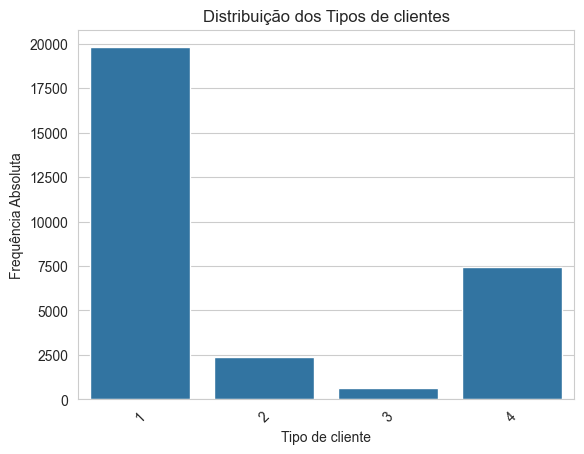

In [103]:
# Visualização por Tipo de cliente da base completa
f = sns.countplot(data=base, x="Tipo de cliente")
f.set_ylabel("Frequência Absoluta")
plt.title("Distribuição dos Tipos de clientes")
plt.xticks(rotation=45)

plt.show()

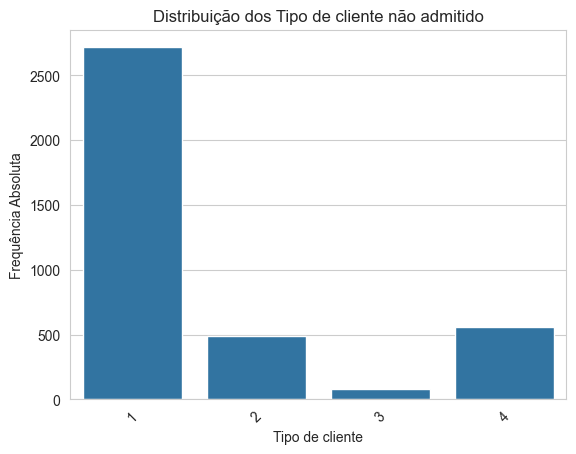

In [104]:
# Visualização por Tipo de cliente não admitido
f = sns.countplot(data=base_nao_admitido, x="Tipo de cliente")
f.set_ylabel("Frequência Absoluta")
plt.title("Distribuição dos Tipo de cliente não admitido")
plt.xticks(rotation=45)

plt.show()

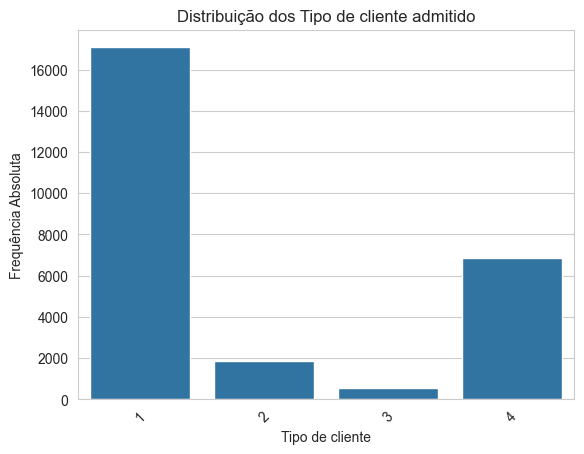

In [105]:
# Visualização por Tipo de cliente admitido
f = sns.countplot(data=base_admitido, x="Tipo de cliente")
f.set_ylabel("Frequência Absoluta")
plt.title("Distribuição dos Tipo de cliente admitido")
plt.xticks(rotation=45)

plt.show()

#### Apenas com a distribuição por Tipo de cliente não é possível determinar.

## 4.2.2. Visualização por Renda.

- A Renda é um fator que influencia nas admissões?

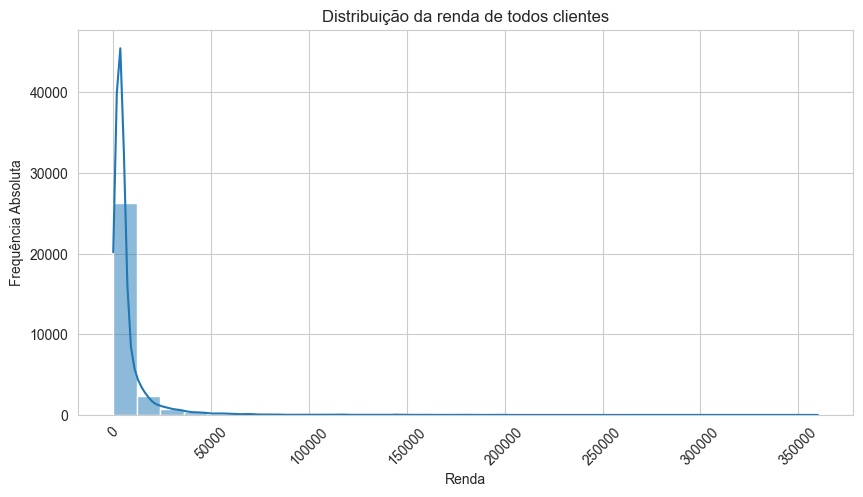

In [106]:
# Renda de todos os clientes da base
plt.figure(figsize=(10,5))
sns.histplot(data=base, x="Renda", bins=30, kde=True)
plt.ylabel("Frequência Absoluta")
plt.xlabel("Renda")
plt.title("Distribuição da renda de todos clientes")
plt.xticks(rotation=45)
plt.show()

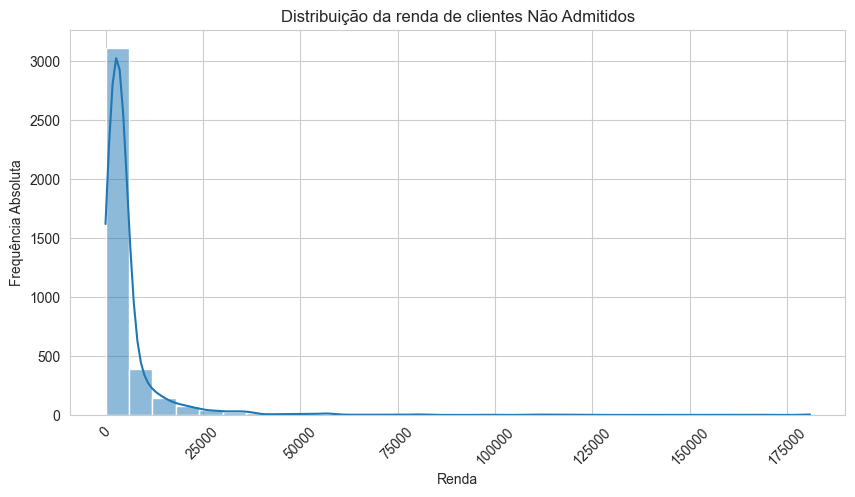

In [107]:
# Renda dos não admitidos
plt.figure(figsize=(10,5))
sns.histplot(data=base_nao_admitido, x="Renda", bins=30, kde=True)
plt.ylabel("Frequência Absoluta")
plt.xlabel("Renda")
plt.title("Distribuição da renda de clientes Não Admitidos")
plt.xticks(rotation=45)
plt.show()

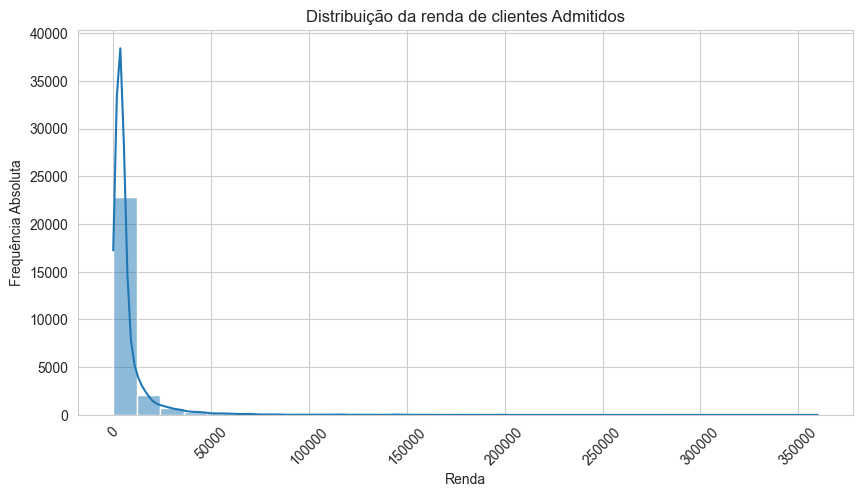

In [108]:
# Renda dos admitidos
plt.figure(figsize=(10,5))
sns.histplot(data=base_admitido, x="Renda", bins=30, kde=True)
plt.ylabel("Frequência Absoluta")
plt.xlabel("Renda")
plt.title("Distribuição da renda de clientes Admitidos")
plt.xticks(rotation=45)
plt.show()

#### A maioria dos clientes admitidos e não admitidos tem renda baixa, concentrada abaixo de R$ 10.000. No entanto, os admitidos parecem ter uma leve concentração maior em rendas mais altas, sugerindo que a renda pode influenciar na admissão.

## 4.2.3. Visualização por Tempo até utilização.

- Clientes que demoram mais para utilizar, são menos admitidos?

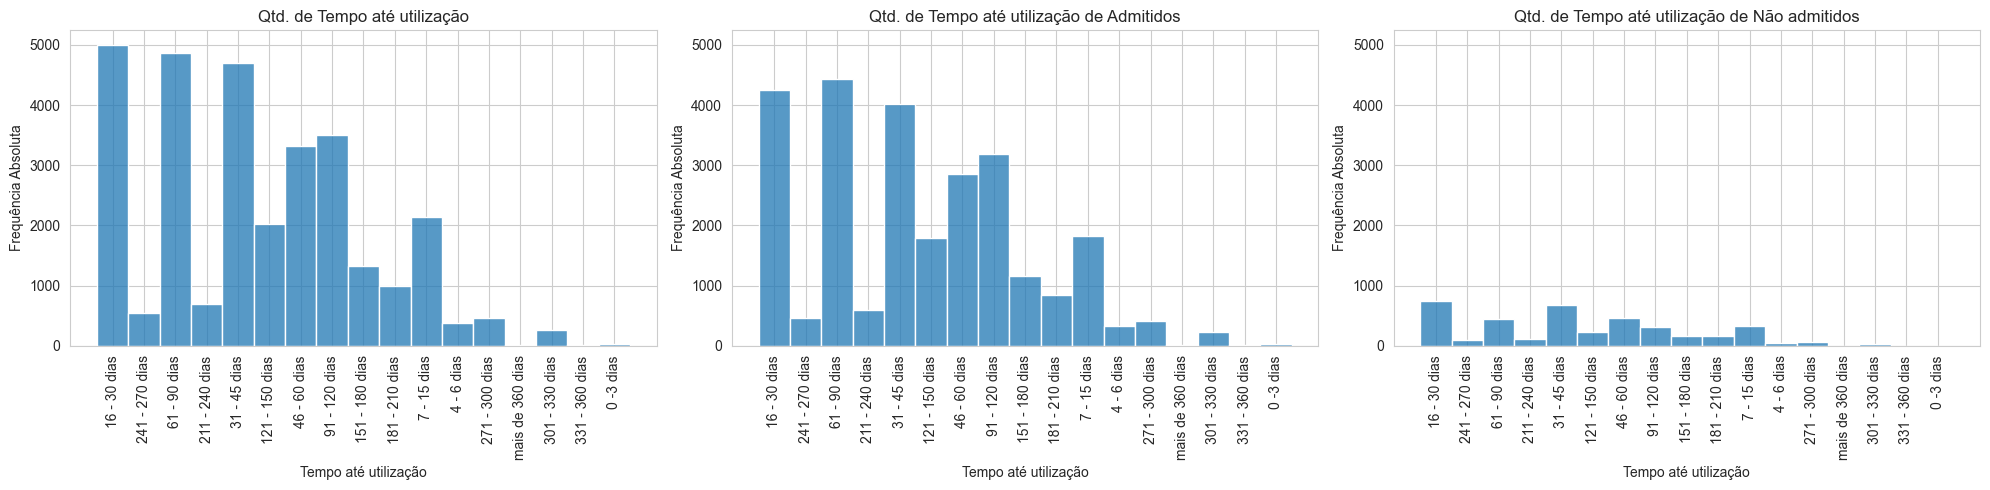

In [109]:
# Configuração para o gráfico
coluna = 'Tempo até utilização'
titulos = ['Qtd. de Tempo até utilização', 'Qtd. de Tempo até utilização de Admitidos', 'Qtd. de Tempo até utilização de Não admitidos']

figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

# Variável para manter o maior valor do eixo Y
max_y = 0 

for i, dataframe in enumerate([base, base_admitido, base_nao_admitido]):  
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[i])
    f.set(title=titulos[i], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Atualiza o maior valor do eixo Y para manter a escala uniforme
    _, max_y_f = f.get_ylim()
    max_y = max(max_y, max_y_f)

# Define a mesma escala do eixo Y para todos os gráficos
for ax in eixos:
    ax.set_ylim(0, max_y)
    ax.tick_params(axis='x', rotation=90) 

plt.tight_layout()

# Exibe os gráficos
plt.show()

#### Analisando os gráficos, o tempo de utilização por si só não caracteriza um motivo de admissão.

## 4.2.4. Visualização por Score Email.

- Como o score email de um cliente se correlaciona com a taxa de admissão?

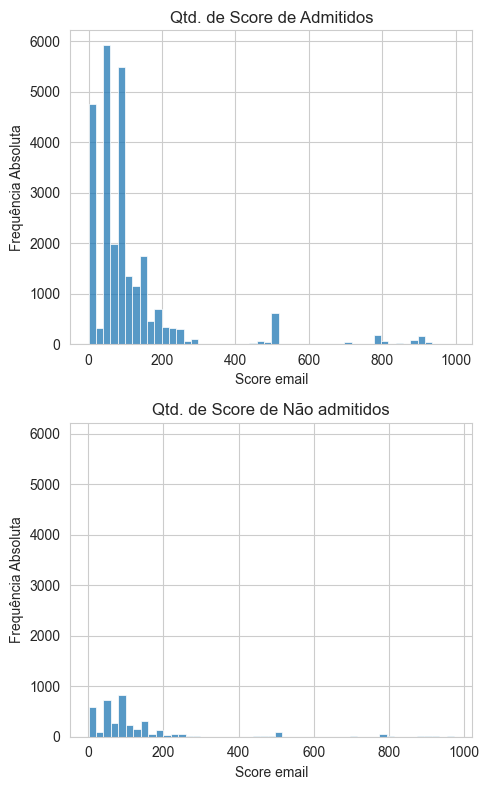

In [110]:
# Configuração para o gráfico
coluna = 'Score Email'
titulos = ['Qtd. de Score de Admitidos', 'Qtd. de Score de Não admitidos']

# Criando os gráficos na vertical
figura, eixos = plt.subplots(2, 1, figsize=(5, 8)) 

# Para manter a escala uniforme
max_y = 0

for i, dataframe in enumerate([base_admitido, base_nao_admitido]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[i], binwidth=20)
    f.set(title=titulos[i], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Ajusta a escala do eixo Y
    _, max_y_f = f.get_ylim()
    max_y = max(max_y, max_y_f)

# Define a mesma escala do eixo Y para todos os gráficos
for ax in eixos:
    ax.set_ylim(0, max_y)
    ax.tick_params(axis='x', labelsize=10, rotation=0)

plt.tight_layout()

plt.show()

#### Conclusão: Clientes com um score de e-mail elevado tendem a ter maior probabilidade de serem admitidos.

## 4.2.5. Visualização por Score Pessoa.

- Como o score pessoa de um cliente se correlaciona com a taxa de admissão?


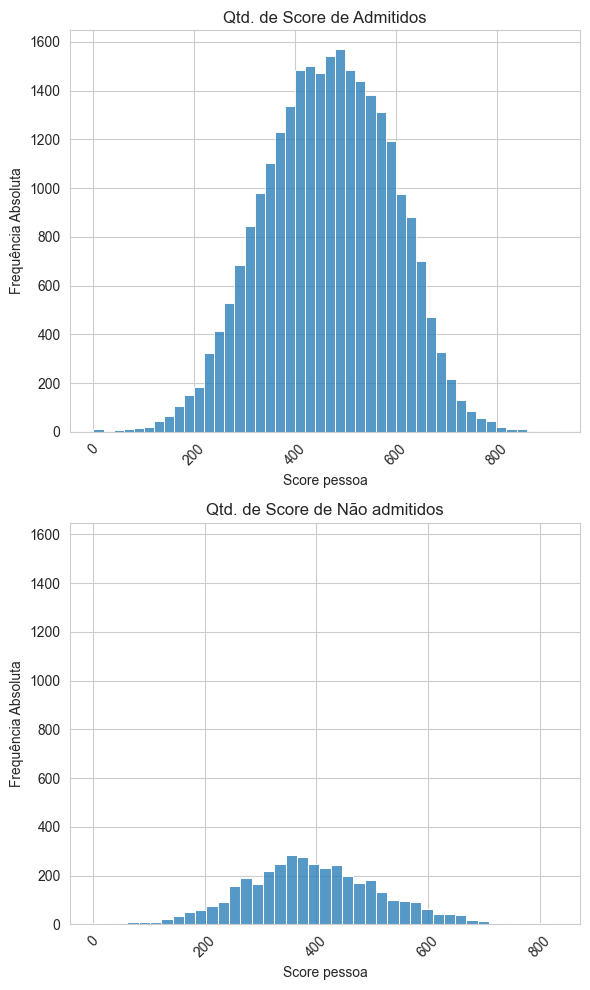

In [111]:
# Configuração para o gráfico
coluna = 'Score Pessoa'
titulos = ['Qtd. de Score de Admitidos', 'Qtd. de Score de Não admitidos']

# Criando os gráficos na vertical
figura, eixos = plt.subplots(2, 1, figsize=(6, 10))

# Para manter a escala uniforme
max_y = 0

for i, dataframe in enumerate([base_admitido, base_nao_admitido]):
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[i], binwidth=20)
    f.set(title=titulos[i], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')

    # Ajusta a escala do eixo Y
    _, max_y_f = f.get_ylim()
    max_y = max(max_y, max_y_f)

# Define a mesma escala do eixo Y para todos os gráficos
for ax in eixos:
    ax.set_ylim(0, max_y)
    ax.tick_params(axis='x', labelsize=10, rotation=45)

plt.tight_layout()  

plt.show()

#### Conclusão: Clientes com um score pessoa elevado tendem a ter maior probabilidade de serem admitidos.

## 4.2.6. Visualização por valor da compra.

- O valor da compra é um fator para decisão de admissão?

C:\Users\Patrick Kwan\AppData\Local\Temp\ipykernel_19768\114853533.py:19: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  figura.show()


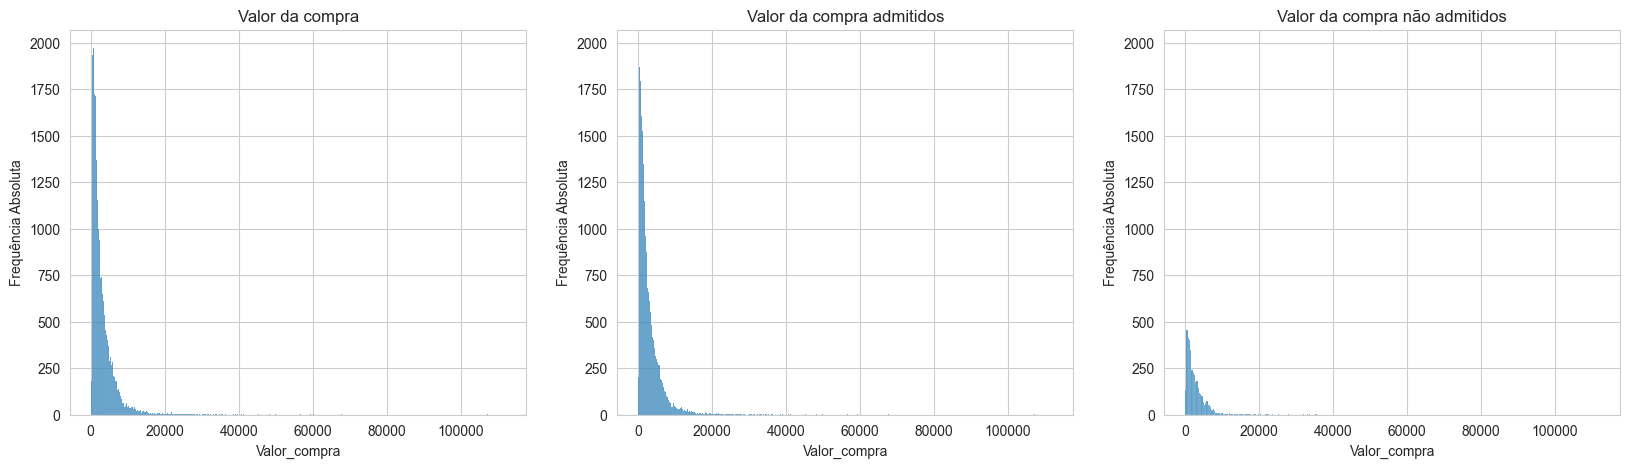

In [112]:
# Configurações do gráfico
coluna = 'valor_compra'
titulos = ['Valor da compra', 'Valor da compra admitidos', 'Valor da compra não admitidos']

eixo = 0
max_y = 0
figura, eixos = plt.subplots(1, 3, figsize=(20, 5), sharex=True)

for dataframe in [base, base_admitido, base_nao_admitido]:
    f = sns.histplot(x=coluna, data=dataframe, stat='count', ax=eixos[eixo])
    f.set(title=titulos[eixo], xlabel=coluna.capitalize(), ylabel='Frequência Absoluta')
    
    _, max_y_f = f.get_ylim()
    max_y = max_y_f if max_y_f > max_y else max_y
    f.set(ylim=(0, max_y))

    eixo += 1

figura.show()

#### Apenas com o valor da compra não é possível determinar se a pessoa será admitida ou não.

## 4.2.7. Visualização Análise geral entre valor de compra, renda e score por status de admissão.

- Relacionando esses fatores é possível ter algum insight favorável para determinar um modelo de admissão?

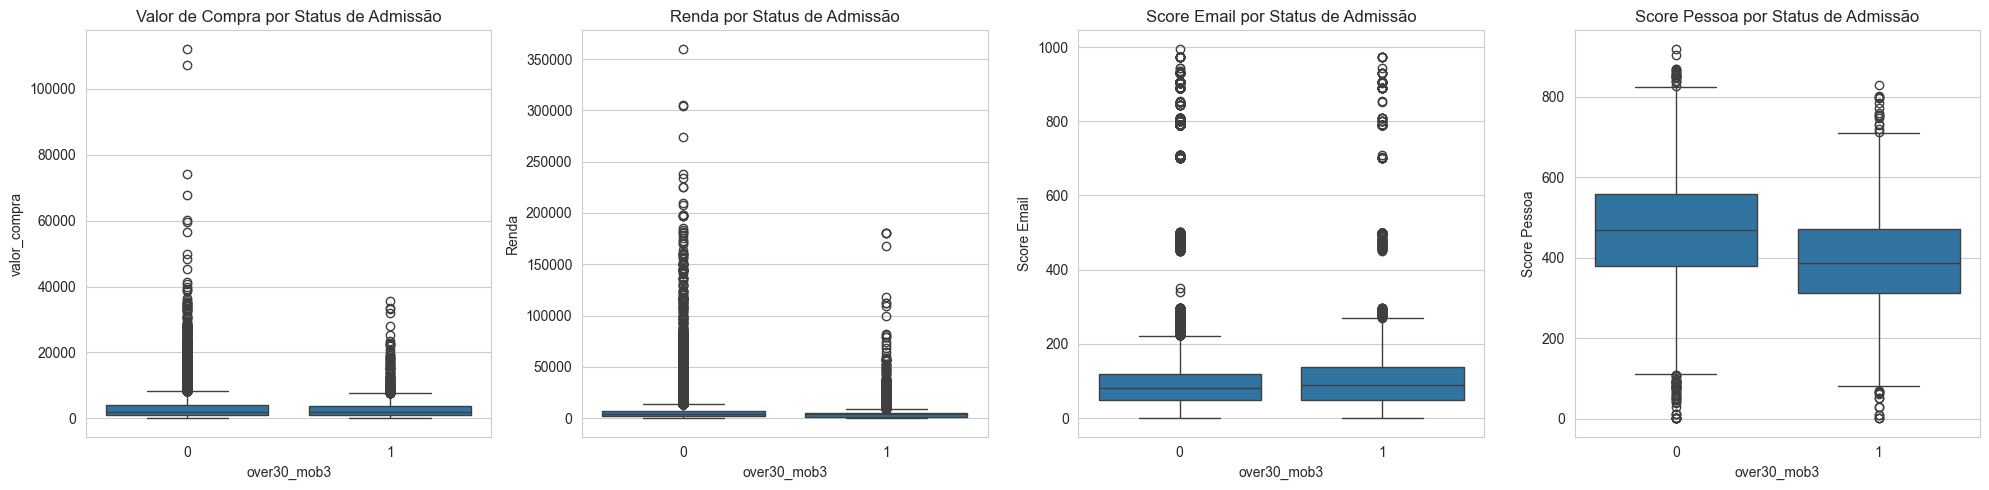

In [113]:
# Configurações do gráfico
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(x="over30_mob3", y="valor_compra", data=base, ax=axes[0])
axes[0].set_title("Valor de Compra por Status de Admissão")

sns.boxplot(x="over30_mob3", y="Renda", data=base, ax=axes[1])
axes[1].set_title("Renda por Status de Admissão")

sns.boxplot(x="over30_mob3", y="Score Email", data=base, ax=axes[2])
axes[2].set_title("Score Email por Status de Admissão")

sns.boxplot(x="over30_mob3", y="Score Pessoa", data=base, ax=axes[3])
axes[3].set_title("Score Pessoa por Status de Admissão")

plt.tight_layout()
plt.show()

#### Conclusão: Pessoas com renda mais alta tendem a ter um score maior e valor de compra maiores, além disso, podemos perceber que, o Score Pessoa mais alto reflete em admitidos com maior frequência.

## 4.3. Análise de compras feitas em horário comercial.

- Pessoas que fazem compra fora do horário comercial podem ser admitidas com menor frequência?

In [114]:
# Cópia da base original
formatada_base = base.copy()
formatada_base.head(5)

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0
5,202212,8,2022-12-17,20,1,5508.40,211 - 240 dias,1,Baixo Risco,hotmail,22.0,1,0,0,MA,18900.0,57.0,485.0


In [115]:
# Convertendo a coluna "Data da compra"
formatada_base["Data compra"] = pd.to_datetime(formatada_base["Data compra"])

# Criando uma coluna "horario_comercial" considerando horários comerciais
formatada_base["horario_comercial"] = formatada_base.apply(
    lambda x: 1 if (8 <= x["Hora da compra"] <= 18 and x["Data compra"].weekday() < 5) else 0, 
    axis=1
)

formatada_base

,safra,id_trx,Data compra,Hora da compra,Tipo de cliente,valor_compra,Tempo até utilização,over30_mob3,risco_validador,provedor_email,idade_cliente,Produto_1,Produto_2,Produto_3,uf,Renda,Score Email,Score Pessoa,horario_comercial
1,202303,2,2023-03-03,15,1,1686.34,16 - 30 dias,0,Baixo Risco,hotmail,34.0,1,0,0,SP,4250.0,85.0,322.0,1
2,202302,3,2023-02-02,19,1,2807.66,241 - 270 dias,0,Baixo Risco,terra,28.0,1,0,0,SP,1700.0,82.0,514.0,0
3,202303,5,2023-03-27,16,1,333.92,16 - 30 dias,1,Baixo Risco,gmail,53.0,1,0,0,PR,2950.0,50.0,441.0,1
4,202303,7,2023-03-06,23,1,2721.98,61 - 90 dias,0,Baixo Risco,hotmail,34.0,1,1,1,BA,3650.0,190.0,474.0,0
5,202212,8,2022-12-17,20,1,5508.40,211 - 240 dias,1,Baixo Risco,hotmail,22.0,1,0,0,MA,18900.0,57.0,485.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,2,6431.54,181 - 210 dias,0,Medio Risco,gmail,28.0,1,1,0,AC,4250.0,5.0,341.0,1
32838,202211,32780,2022-11-19,10,2,1702.78,46 - 60 dias,1,Baixo Risco,yahoo,33.0,1,0,0,SP,1500.0,137.0,290.0,0
32839,202212,32793,2022-12-10,1,2,6515.57,91 - 120 dias,0,Baixo Risco,hotmail,39.0,1,1,0,MG,7150.0,90.0,527.0,0
32840,202301,32804,2023-01-29,21,2,1320.00,16 - 30 dias,0,Baixo Risco,gmail,34.0,1,0,0,SP,3700.0,79.0,483.0,0


In [116]:
# Total de admitidos
total_admitidos = formatada_base[formatada_base["over30_mob3"] == 0].shape[0]

# Admitidos que compraram no horário comercial
admitidos_horario_comercial = formatada_base[(formatada_base["over30_mob3"] == 0) & (formatada_base["horario_comercial"] == 1)].shape[0]

# Cálculo da proporção
proporcao = admitidos_horario_comercial / total_admitidos * 100

print(f"Total de admitidos: {total_admitidos}")
print(f"Admitidos que compraram no horário comercial: {admitidos_horario_comercial}")
print(f"Proporção: {proporcao:.2f}%")

Total de admitidos: 26404
Admitidos que compraram no horário comercial: 11720
Proporção: 44.39%


In [117]:
# Total de nao admitidos
total_não_admitidos = formatada_base[formatada_base["over30_mob3"] == 1].shape[0]

# Não Admitidos que compraram no horário comercial
nao_admitidos_comercial = formatada_base[(formatada_base["over30_mob3"] == 1) & (formatada_base["horario_comercial"] == 1)].shape[0]

# Cálculo da proporção
proporcao = nao_admitidos_comercial / total_não_admitidos * 100

print(f"Total de não admitidos: {total_não_admitidos}")
print(f"Não Admitidos que compraram no horário comercial: {nao_admitidos_comercial}")
print(f"Proporção: {proporcao:.2f}%")


Total de não admitidos: 3841
Não Admitidos que compraram no horário comercial: 1655
Proporção: 43.09%


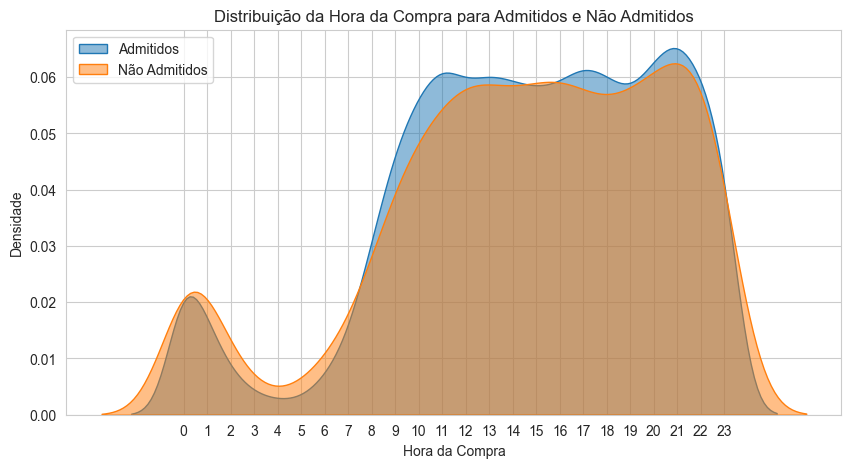

In [118]:
# Criando um gráfico de densidade para comparar as distribuições
plt.figure(figsize=(10,5))
sns.kdeplot(formatada_base[formatada_base["over30_mob3"] == 0]["Hora da compra"], label="Admitidos", fill=True, alpha=0.5)
sns.kdeplot(formatada_base[formatada_base["over30_mob3"] == 1]["Hora da compra"], label="Não Admitidos", fill=True, alpha=0.5)

# Adicionando legendas
plt.xlabel("Hora da Compra")
plt.ylabel("Densidade")
plt.title("Distribuição da Hora da Compra para Admitidos e Não Admitidos")
plt.legend()
plt.xticks(range(0, 24))

# Exibir gráfico
plt.show()

#### Percebe-se que não é possível determinar se a pessoa será admitida ou não caso compre no horário comercial.

# 5. Aprofundando as análises.

## 5.1. Normalizando a base.

- A partir da análise exploratório percebe-se que, é de alta relevância realizar uma normalização da base para se ter resultados mais precisos.

In [119]:
# Criando uma cópia para normalização
base_normalizada = formatada_base.copy()

# Avaliando os tipos de colunas
base_normalizada.dtypes


safra                            int64
id_trx                           int64
Data compra             datetime64[ns]
Hora da compra                   int64
Tipo de cliente                  int64
valor_compra                   float64
Tempo até utilização            object
over30_mob3                      int64
risco_validador                 object
provedor_email                  object
idade_cliente                  float64
Produto_1                        int64
Produto_2                        int64
Produto_3                        int64
uf                              object
Renda                          float64
Score Email                    float64
Score Pessoa                   float64
horario_comercial                int64
dtype: object

In [120]:
# Utilizando get_dummies para transformação das variáveis categóricas
base_normalizada = pd.get_dummies(base_normalizada, columns=['risco_validador', 'Tipo de cliente'])

In [121]:
# Ajustando as linhas e trocando False por 0 e True por 1
base_normalizada = base_normalizada.replace({False: 0})
base_normalizada = base_normalizada.replace({True: 1})

base_normalizada

C:\Users\Patrick Kwan\AppData\Local\Temp\ipykernel_19768\2725099644.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  base_normalizada = base_normalizada.replace({True: 1})


,safra,id_trx,Data compra,Hora da compra,valor_compra,Tempo até utilização,over30_mob3,provedor_email,idade_cliente,Produto_1,...,Score Email,Score Pessoa,horario_comercial,risco_validador_Alto Risco,risco_validador_Baixo Risco,risco_validador_Medio Risco,Tipo de cliente_1,Tipo de cliente_2,Tipo de cliente_3,Tipo de cliente_4
1,202303,2,2023-03-03,15,1686.34,16 - 30 dias,0,hotmail,34.0,1,...,85.0,322.0,1,0,1,0,1,0,0,0
2,202302,3,2023-02-02,19,2807.66,241 - 270 dias,0,terra,28.0,1,...,82.0,514.0,0,0,1,0,1,0,0,0
3,202303,5,2023-03-27,16,333.92,16 - 30 dias,1,gmail,53.0,1,...,50.0,441.0,1,0,1,0,1,0,0,0
4,202303,7,2023-03-06,23,2721.98,61 - 90 dias,0,hotmail,34.0,1,...,190.0,474.0,0,0,1,0,1,0,0,0
5,202212,8,2022-12-17,20,5508.40,211 - 240 dias,1,hotmail,22.0,1,...,57.0,485.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,202303,32766,2023-03-24,13,6431.54,181 - 210 dias,0,gmail,28.0,1,...,5.0,341.0,1,0,0,1,0,1,0,0
32838,202211,32780,2022-11-19,10,1702.78,46 - 60 dias,1,yahoo,33.0,1,...,137.0,290.0,0,0,1,0,0,1,0,0
32839,202212,32793,2022-12-10,1,6515.57,91 - 120 dias,0,hotmail,39.0,1,...,90.0,527.0,0,0,1,0,0,1,0,0
32840,202301,32804,2023-01-29,21,1320.00,16 - 30 dias,0,gmail,34.0,1,...,79.0,483.0,0,0,1,0,0,1,0,0


In [122]:
# Decidi remover algumas colunas afins de novas análises, não necessitaremos desses dados no momento
base_normalizada_sem_colunas = base_normalizada.drop(columns=['Tempo até utilização','Data compra', 'Hora da compra', 'provedor_email','id_trx','safra','uf'])
base_normalizada_sem_colunas

,valor_compra,over30_mob3,idade_cliente,Produto_1,Produto_2,Produto_3,Renda,Score Email,Score Pessoa,horario_comercial,risco_validador_Alto Risco,risco_validador_Baixo Risco,risco_validador_Medio Risco,Tipo de cliente_1,Tipo de cliente_2,Tipo de cliente_3,Tipo de cliente_4
1,1686.34,0,34.0,1,0,0,4250.0,85.0,322.0,1,0,1,0,1,0,0,0
2,2807.66,0,28.0,1,0,0,1700.0,82.0,514.0,0,0,1,0,1,0,0,0
3,333.92,1,53.0,1,0,0,2950.0,50.0,441.0,1,0,1,0,1,0,0,0
4,2721.98,0,34.0,1,1,1,3650.0,190.0,474.0,0,0,1,0,1,0,0,0
5,5508.40,1,22.0,1,0,0,18900.0,57.0,485.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32837,6431.54,0,28.0,1,1,0,4250.0,5.0,341.0,1,0,0,1,0,1,0,0
32838,1702.78,1,33.0,1,0,0,1500.0,137.0,290.0,0,0,1,0,0,1,0,0
32839,6515.57,0,39.0,1,1,0,7150.0,90.0,527.0,0,0,1,0,0,1,0,0
32840,1320.00,0,34.0,1,0,0,3700.0,79.0,483.0,0,0,1,0,0,1,0,0


In [123]:
# Filtrando apenas por admitidos
df_nao_admitidos = base_normalizada_sem_colunas[base_normalizada_sem_colunas["over30_mob3"] == 1]

# Selecionar 3.841 linhas aleatórias dos não admitidos (3841 são a quantidade de não admitidos da base)
df_amostra1 = df_nao_admitidos.sample(n=3841, random_state=42)

# Filtrar apenas por não admitidos
df_admitidos = base_normalizada_sem_colunas[base_normalizada_sem_colunas["over30_mob3"] == 0]

# Selecionar 3.841 linhas aleatórias dos admitidos
df_amostra2 = df_admitidos.sample(n=3841, random_state=42)

df_normalizado = pd.concat([df_amostra1,df_amostra2], ignore_index=True)
df_normalizado

,valor_compra,over30_mob3,idade_cliente,Produto_1,Produto_2,Produto_3,Renda,Score Email,Score Pessoa,horario_comercial,risco_validador_Alto Risco,risco_validador_Baixo Risco,risco_validador_Medio Risco,Tipo de cliente_1,Tipo de cliente_2,Tipo de cliente_3,Tipo de cliente_4
0,7276.01,1,39.0,1,1,0,6650.0,190.0,613.0,1,0,0,1,1,0,0,0
1,544.00,1,44.0,1,0,0,3650.0,50.0,486.0,0,0,1,0,0,1,0,0
2,859.32,1,28.0,1,0,0,1000.0,140.0,448.0,0,0,0,1,0,0,0,1
3,8204.61,1,22.0,1,1,0,4350.0,91.0,331.0,0,0,1,0,0,0,0,1
4,989.77,1,33.0,1,0,0,2250.0,79.0,347.0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,9961.88,0,50.0,1,0,0,4300.0,150.0,514.0,1,0,1,0,0,0,0,1
7678,572.93,0,24.0,1,0,0,3700.0,3.0,389.0,1,0,1,0,0,0,0,1
7679,414.42,0,22.0,1,0,0,4100.0,500.0,550.0,1,0,1,0,1,0,0,0
7680,2324.97,0,34.0,1,1,0,4400.0,64.0,449.0,0,0,1,0,1,0,0,0


In [124]:
df_normalizado.columns

Index(['valor_compra', 'over30_mob3', 'idade_cliente', 'Produto_1',
       'Produto_2', 'Produto_3', 'Renda', 'Score Email', 'Score Pessoa',
       'horario_comercial', 'risco_validador_Alto Risco',
       'risco_validador_Baixo Risco', 'risco_validador_Medio Risco',
       'Tipo de cliente_1', 'Tipo de cliente_2', 'Tipo de cliente_3',
       'Tipo de cliente_4'],
      dtype='object')

In [127]:
# Selecionando as colunas para normalizar
scaler = StandardScaler()
df_normalizado[['valor_compra', 'Renda', 'idade_cliente', 'Score Email', 'Score Pessoa']] = scaler.fit_transform(df_normalizado[['valor_compra', 'Renda', 'idade_cliente', 'Score Email', 'Score Pessoa']])

# Dados normalizados
print(df_normalizado[['valor_compra', 'Renda', 'idade_cliente', 'Score Email', 'Score Pessoa']].head())

   valor_compra     Renda  idade_cliente  Score Email  Score Pessoa
0      1.400903  0.013623       0.349243     0.492389      1.430779
1     -0.774901 -0.242621       0.770669    -0.439456      0.438065
2     -0.672989 -0.468969      -0.577895     0.159587      0.141032
3      1.701029 -0.182831      -1.083606    -0.166559     -0.773515
4     -0.630827 -0.362201      -0.156469    -0.246431     -0.648449


In [128]:
df_normalizado.head(5)

,valor_compra,over30_mob3,idade_cliente,Produto_1,Produto_2,Produto_3,Renda,Score Email,Score Pessoa,horario_comercial,risco_validador_Alto Risco,risco_validador_Baixo Risco,risco_validador_Medio Risco,Tipo de cliente_1,Tipo de cliente_2,Tipo de cliente_3,Tipo de cliente_4
0,1.400903,1,0.349243,1,1,0,0.013623,0.492389,1.430779,1,0,0,1,1,0,0,0
1,-0.774901,1,0.770669,1,0,0,-0.242621,-0.439456,0.438065,0,0,1,0,0,1,0,0
2,-0.672989,1,-0.577895,1,0,0,-0.468969,0.159587,0.141032,0,0,0,1,0,0,0,1
3,1.701029,1,-1.083606,1,1,0,-0.182831,-0.166559,-0.773515,0,0,1,0,0,0,0,1
4,-0.630827,1,-0.156469,1,0,0,-0.362201,-0.246431,-0.648449,0,0,1,0,1,0,0,0


## 5.2. Gráfico de correlação

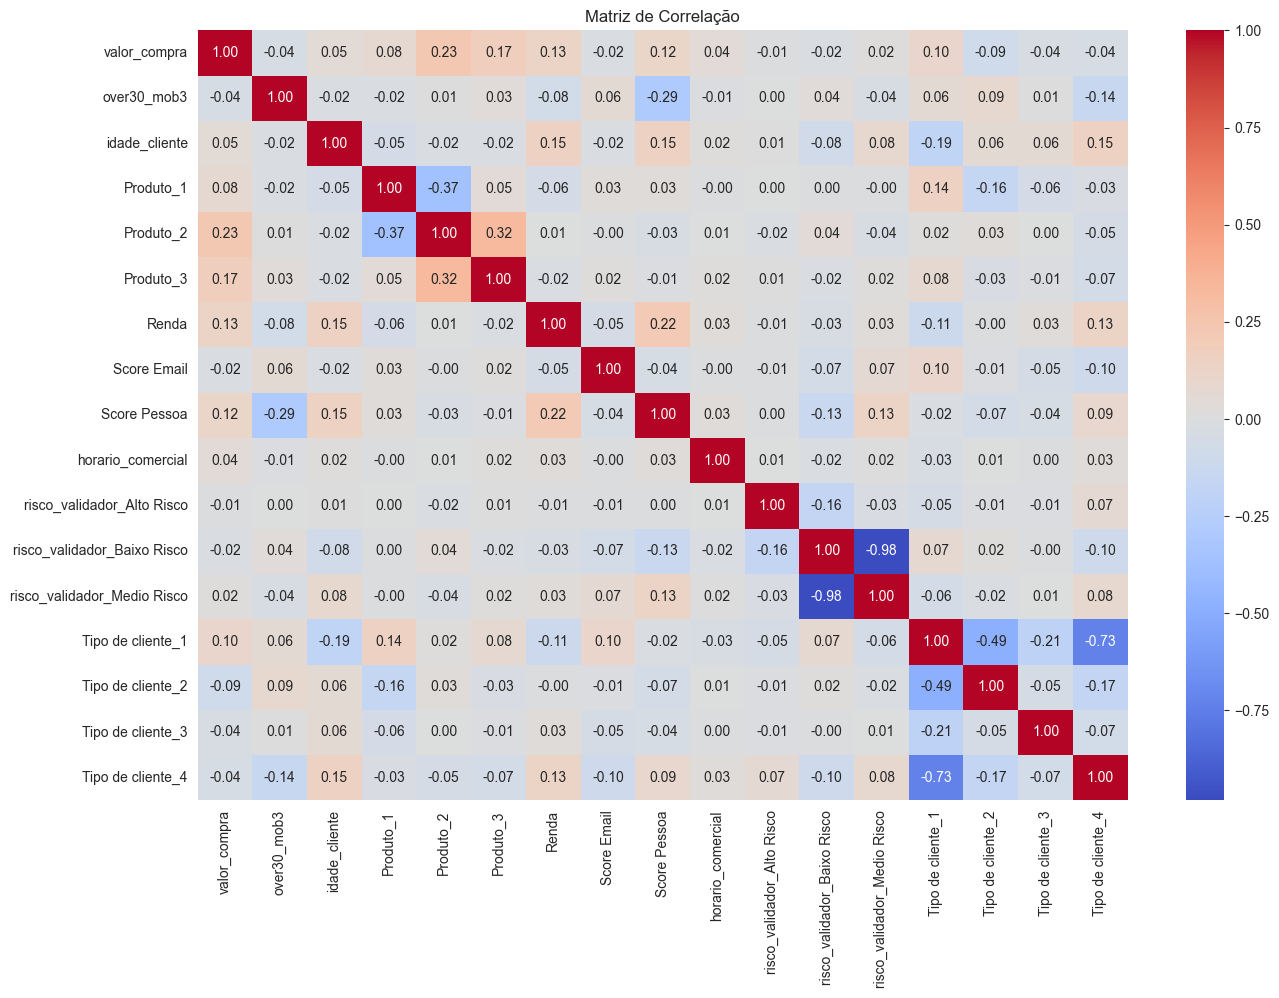

In [129]:
# Selecionando as colunas numéricas para correlação
variaveis_numericas = ['valor_compra', 'over30_mob3', 'idade_cliente', 'Produto_1',
       'Produto_2', 'Produto_3', 'Renda', 'Score Email', 'Score Pessoa',
       'horario_comercial', 'risco_validador_Alto Risco',
       'risco_validador_Baixo Risco', 'risco_validador_Medio Risco',
       'Tipo de cliente_1', 'Tipo de cliente_2', 'Tipo de cliente_3',
       'Tipo de cliente_4']
corr_matrix = df_normalizado[variaveis_numericas].corr()

# Criando correlação
plt.figure(figsize=(15,10))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlação")
plt.show()

#### Conclusão: A partir do gráfico de correlação, podemos observar que a variável Score Pessoa apresenta a correlação mais forte com a variável resposta over30_mob3. Isso indica que, quanto maior o Score Pessoa, maiores são as chances de admissão, enquanto quanto menor o Score Pessoa, menores são as chances de ser admitido.

## 5.3. Treinando o modelo.

In [130]:
# Separando X (variáveis independentes) e y (target)
X = df_normalizado.drop(columns=['over30_mob3'])
y = df_normalizado['over30_mob3']

# Variáveis categóricas
X = pd.get_dummies(X)

# Dividir os dados em treino e teste (70% treino, 30% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [131]:
df_normalizado.columns

Index(['valor_compra', 'over30_mob3', 'idade_cliente', 'Produto_1',
       'Produto_2', 'Produto_3', 'Renda', 'Score Email', 'Score Pessoa',
       'horario_comercial', 'risco_validador_Alto Risco',
       'risco_validador_Baixo Risco', 'risco_validador_Medio Risco',
       'Tipo de cliente_1', 'Tipo de cliente_2', 'Tipo de cliente_3',
       'Tipo de cliente_4'],
      dtype='object')

### 5.4. Modelo com rede neural.

In [132]:
# Construção do modelo com melhorias
model = Sequential([
    Dense(64, activation='relu', input_dim=X_train.shape[1]),
    Dropout(0.3),  
    Dense(32, activation='relu'),
    Dropout(0.3),  
    Dense(16, activation='relu'),
    Dense(1, activation='sigmoid')  # Saída binária (0 ou 1)
])

# Modelo customizado

# Ajuste do learning rate
optimizer = Adam(learning_rate=0.001) 
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Early Stopping para evitar overfitting e parar o treinamento quando não houver mais melhoria
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Treinamento do modelo
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), callbacks=[early_stopping])

C:\Users\Patrick Kwan\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.5266 - loss: 0.6988 - val_accuracy: 0.6178 - val_loss: 0.6613
Epoch 2/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.6010 - loss: 0.6656 - val_accuracy: 0.6208 - val_loss: 0.6504
Epoch 3/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6282 - loss: 0.6523 - val_accuracy: 0.6195 - val_loss: 0.6487
Epoch 4/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.6388 - loss: 0.6470 - val_accuracy: 0.6161 - val_loss: 0.6509
Epoch 5/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6408 - loss: 0.6426 - val_accuracy: 0.6260 - val_loss: 0.6501
Epoch 6/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6347 - loss: 0.6446 - val_accuracy: 0.6221 - val_loss: 0.6483
Epoch 7/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6326 - loss: 0.6428 - val_accuracy: 0.6230 - val_loss: 0.6487
Epoch 8/50
169/169 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6513 - loss: 0.6361 - val_accuracy: 0

#### A partir do modelo de rede neural percebe-se que, o modelo conseguiu aprender porém, é necessária a implementação de melhorias.

## 5.5. Modelo matriz confusão.

In [133]:
#Matriz confusão
# Avaliar o modelo
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Acurácia: {accuracy:.2f}")

# Fazer previsões no conjunto de teste
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5).astype(int)  # Converter para 0 ou 1

# Exibir relatório de classificação
print(classification_report(y_test, y_pred))

# Matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matriz de Confusão:")
print(conf_matrix)


73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6144 - loss: 0.6492
Acurácia: 0.62
73/73 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
              precision    recall  f1-score   support

           0       0.63      0.58      0.60      1146
           1       0.62      0.66      0.64      1159

    accuracy                           0.62      2305
   macro avg       0.62      0.62      0.62      2305
weighted avg       0.62      0.62      0.62      2305

Matriz de Confusão:
[[665 481]
 [390 769]]


#### O modelo apresentou uma acurácia de 62%, o que demonstra um resultado razoável porém, pode ser melhorado.

In [134]:
df_normalizado

,valor_compra,over30_mob3,idade_cliente,Produto_1,Produto_2,Produto_3,Renda,Score Email,Score Pessoa,horario_comercial,risco_validador_Alto Risco,risco_validador_Baixo Risco,risco_validador_Medio Risco,Tipo de cliente_1,Tipo de cliente_2,Tipo de cliente_3,Tipo de cliente_4
0,1.400903,1,0.349243,1,1,0,0.013623,0.492389,1.430779,1,0,0,1,1,0,0,0
1,-0.774901,1,0.770669,1,0,0,-0.242621,-0.439456,0.438065,0,0,1,0,0,1,0,0
2,-0.672989,1,-0.577895,1,0,0,-0.468969,0.159587,0.141032,0,0,0,1,0,0,0,1
3,1.701029,1,-1.083606,1,1,0,-0.182831,-0.166559,-0.773515,0,0,1,0,0,0,0,1
4,-0.630827,1,-0.156469,1,0,0,-0.362201,-0.246431,-0.648449,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7677,2.268983,0,1.276380,1,0,0,-0.187101,0.226148,0.656931,1,0,1,0,0,0,0,1
7678,-0.765551,0,-0.915036,1,0,0,-0.238350,-0.752290,-0.320150,1,0,1,0,0,0,0,1
7679,-0.816782,0,-1.083606,1,0,0,-0.204184,2.555761,0.938330,1,0,1,0,1,0,0,0
7680,-0.199287,0,-0.072183,1,1,0,-0.178560,-0.346272,0.148849,0,0,1,0,1,0,0,0


## 5.6. Utilizando Floresta Aleatória.

Métricas de Avaliação do Modelo:
              precision    recall  f1-score   support

           0       0.61      0.61      0.61       767
           1       0.61      0.61      0.61       770

    accuracy                           0.61      1537
   macro avg       0.61      0.61      0.61      1537
weighted avg       0.61      0.61      0.61      1537

Matriz de Confusão:
[[469 298]
 [298 472]]
                        Feature  Importance
7                  Score Pessoa    0.251173
0                  valor_compra    0.185733
5                         Renda    0.164245
6                   Score Email    0.143345
1                 idade_cliente    0.132971
8             horario_comercial    0.023783
3                     Produto_2    0.019457
15            Tipo de cliente_4    0.014856
4                     Produto_3    0.010774
10  risco_validador_Baixo Risco    0.010181
11  risco_validador_Medio Risco    0.010003
13            Tipo de cliente_2    0.009744
12            Tipo de cli

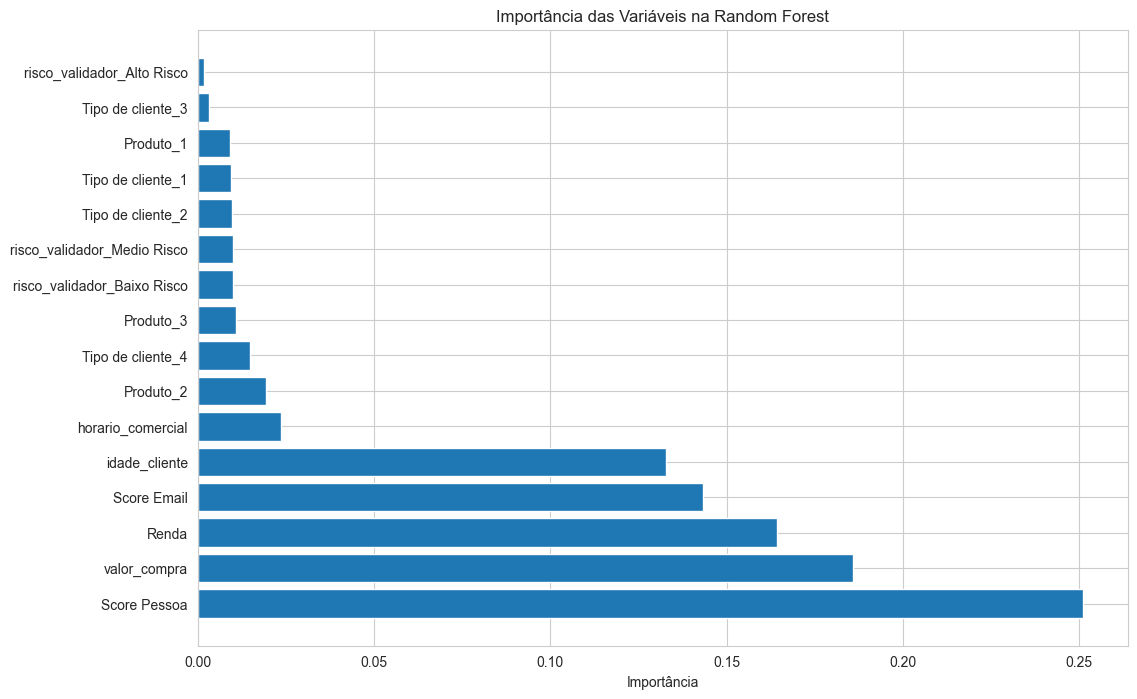

In [135]:
# Definindo a variável de entrada (X) e a variável alvo (y)
X = df_normalizado.drop(columns=['over30_mob3'])
y = df_normalizado['over30_mob3']

# Variáveis categóricas
X = pd.get_dummies(X)

# Dividindo os dados em treino e teste (80% treino, 20% teste)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializando o modelo de Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)  

# Treinando o modelo com os dados de treino
rf_model.fit(X_train, y_train)

# Predições nos dados de teste
y_pred = rf_model.predict(X_test)

# Avaliando o modelo com métricas
print("Métricas de Avaliação do Modelo:")
print(classification_report(y_test, y_pred))  
print("Matriz de Confusão:")
print(confusion_matrix(y_test, y_pred)) 

# Visualizando a importância das variáveis
feature_importances = rf_model.feature_importances_

# Organizando as variáveis e suas importâncias
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenando por importância
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Exibindo a importância das variáveis
print(feature_importance_df)

# Gráfico de importância das variáveis
plt.figure(figsize=(12,8))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importância')
plt.title('Importância das Variáveis na Random Forest')
plt.show()


#### Com o modelo gerado, podemos observar que há uma forte influência do Score Pessoa, valor da compra, renda e Score de Email na decisão sobre a admissão da pessoa.

# 6. Conclusão

#### - A partir das análises e do desenvolvimento do modelo de admissão, podemos concluir que a criação de um modelo preditivo para prever a admissão de clientes é viável e útil. Identificamos que variáveis como Score Pessoa, valor da compra, renda e Score de Email influenciam fortemente a chance de uma pessoa ser admitida. Usando técnicas como normalização, One-Hot Encoding e uma rede neural, conseguimos criar um modelo com bons resultados, mas que ainda pode ser melhorado.

#### - O objetivo desse modelo é criar uma ferramenta automatizada para agilizar o processo de admissão, permitindo analisar padrões de comportamento e características dos clientes. Com base nas variáveis mais importantes, o modelo pode antecipar as decisões de admissão, tornando o processo mais eficiente e preciso. No futuro, podemos melhorar o modelo ajustando parâmetros, incluindo novas variáveis ou aplicando técnicas para balancear as classes, visando um desempenho ainda melhor. Esse modelo tem o potencial de ajudar a tomar decisões mais assertivas e baseadas em dados dentro da organização.